<a href="https://colab.research.google.com/github/ujjwalrajput31/python-ml-portfolio/blob/main/Mall%20Customer_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customers - DBSCAN Clustering

This notebook applies **DBSCAN clustering** to the Mall Customers dataset.
We will:
- Load the dataset
- Explore basic details
- Apply DBSCAN
- Visualize clusters
- Tune parameters using k-distance plot

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Load dataset (make sure Mall_Customers.csv is in same folder)
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Select features
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## K-distance plot
We use this to estimate a good value for `eps`.

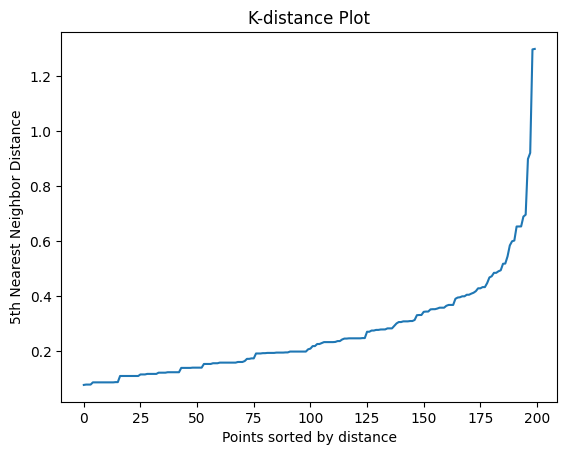

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("K-distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

## Apply DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df['Cluster'] = labels
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


In [ ]:
# Cluster counts
df['Cluster'].value_counts()

,count
Cluster,
0,157
1,35
-1,8


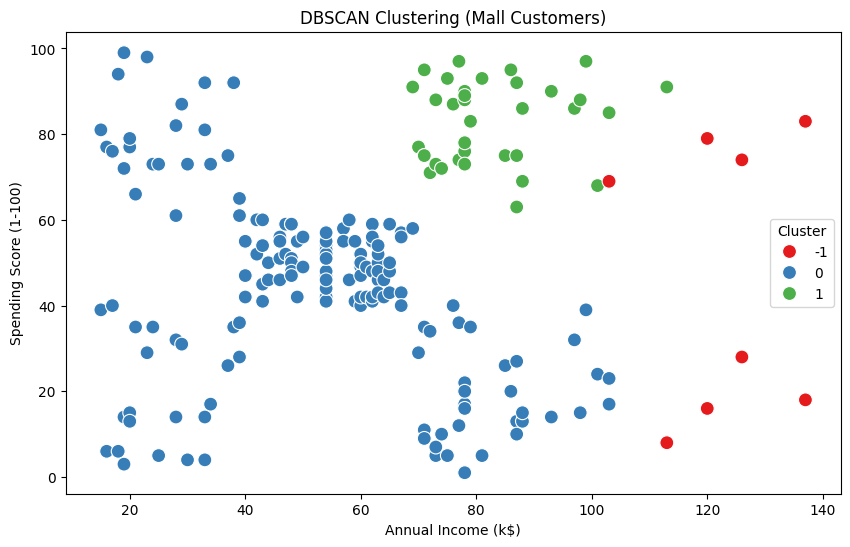

In [ ]:
# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='Set1', s=100)
plt.title("DBSCAN Clustering (Mall Customers)")
plt.show()